In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

# Reading

### Reading an image

In [5]:
img = cv.imread("dog.jpeg") #read image as pixels
print(img.shape)

(507, 900, 3)


In [6]:
cv.imshow('dog',img) # show image in a new window with "dog" as window name
cv.waitKey(0) # wait inf until a key is pressed on keyboard

-1

##### As cv.imshow() sometime doesnt work in jupyter file, we can use plt.imshow()

### Reading Video

In [15]:
capture = cv.VideoCapture("0702.mp4")

In [17]:
while True:
    isTrue, frame = capture.read() # read video frame by frame
    cv.imshow("Video",frame) # show each frame

    if cv.waitKey(20) & 0xFF == ord('d'): # when letter d is pressed, break out of the loop
        break

capture.release() # release capture pointer
cv.destroyAllWindows()

# Resizing & Rescaling

### Large files takes alot of strain to process
### Resize : change height/width
### Rescale: increase/decrease size but ratio of height to width remains same

### Rescale/Resize image/video

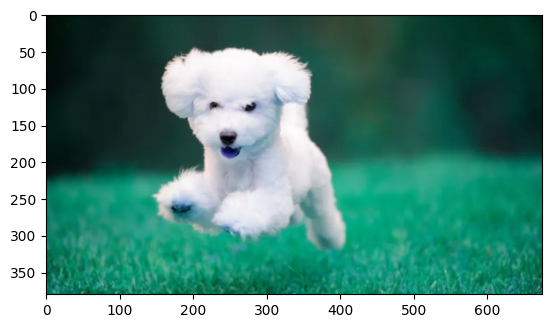

In [6]:
# function can be used for both images and videos
def rescaleFrame(frame,scale=0.75):
    # int applied so new values are whole numbers
    width = int(frame.shape[1] * scale) # new width size
    height = int(frame.shape[0] * scale) # new scale size

    dimension = (width,height)

    return cv.resize(frame,dimension,interpolation=cv.INTER_AREA)

img = cv.imread("dog.jpeg") #read image as pixels
img = rescaleFrame(img,scale=0.75)
plt.imshow(img)

### Specifically Rescale/Resize Videos

In [18]:
def changeRes(width,height):
    capture.set(3,width) # set property 3 which is width
    capture.set(4,height) # set property 4 which is height

# Draw and Write on Images

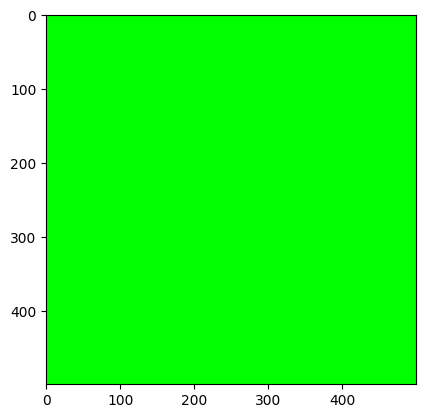

In [24]:
img = cv.imread("dog.jpeg")
blank = np.zeros((500,500,3),dtype='uint8') # will create a black image of size 500,500
blank[:] = 0,255,0 # change all pixels to green
plt.imshow(blank)

### Drawing a shape

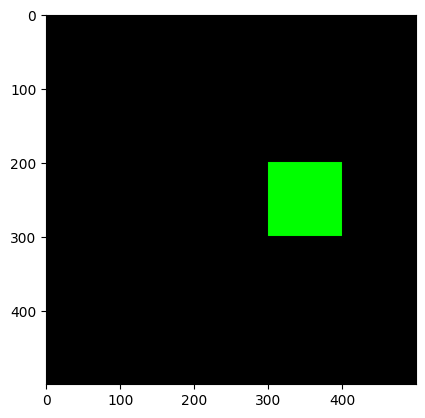

In [25]:
blank = np.zeros((500,500,3),dtype='uint8') # will create a black image of size 500,500
blank[200:300,300:400] = 0,255,0 # create a green square
plt.imshow(blank)

### Drawing a rectangle

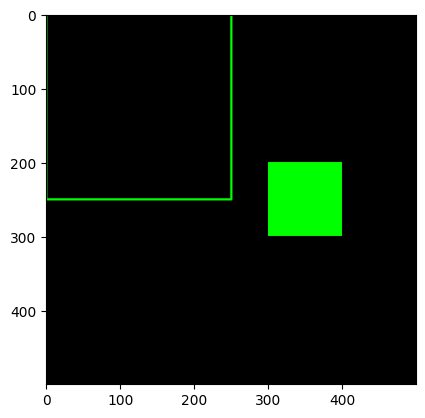

In [26]:
cv.rectangle(blank,(0,0),(250,250),(0,255,0),thickness=2) # create a rectangle with image "blank", coordinates (0,0) to (250,250), color (0,255,0) and thickness of 2
plt.imshow(blank)

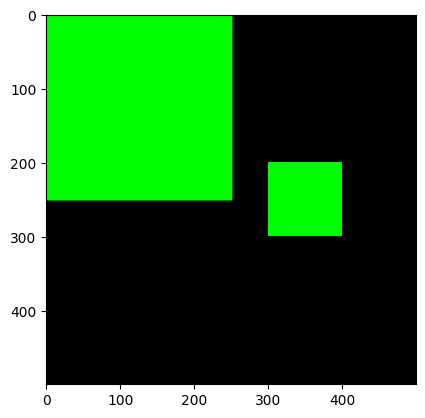

In [27]:
cv.rectangle(blank,(0,0),(250,250),(0,255,0),thickness=cv.FILLED) # create a rectangle with image "blank", coordinates (0,0) to (250,250), color (0,255,0) and fill it
plt.imshow(blank)

### create a rectangle half of image's width and height

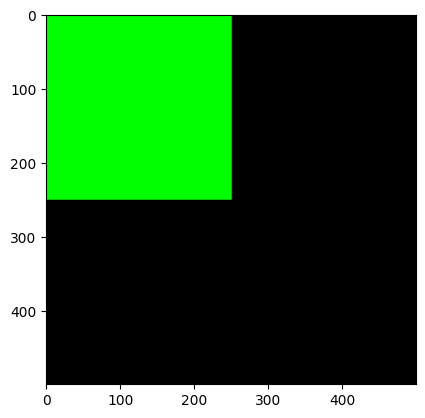

In [28]:
blank = np.zeros((500,500,3),dtype='uint8')
cv.rectangle(blank,(0,0),(blank.shape[0]//2,blank.shape[1]//2),(0,255,0),thickness=cv.FILLED)
plt.imshow(blank)

### Drawing a circle

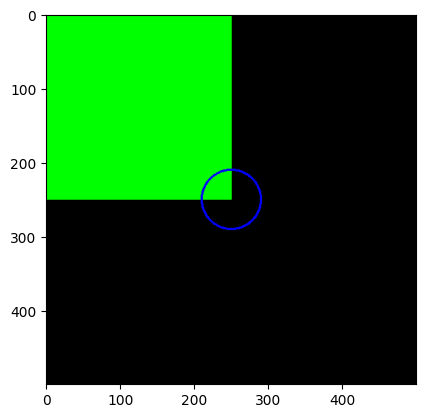

In [29]:
cv.circle(blank,(250,250),40,(0,0,255),thickness=2) # draw a circle at (250.250), radius of 40, color of (0,0,255) and thickness of 2
plt.imshow(blank)

### Drawing a Line

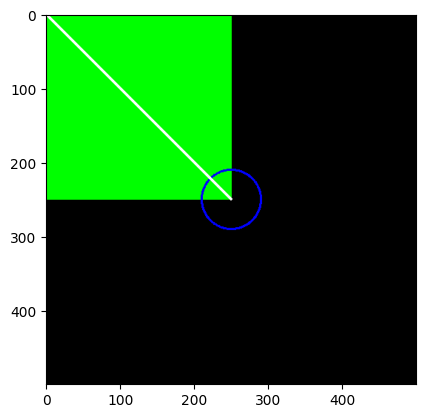

In [30]:
cv.line(blank,(0,0),(blank.shape[0]//2,blank.shape[1]//2),(255,255,255),thickness=2) # draw a circle from (0,0) to half of width/height, color of (255,255,255) and thickness of 2
plt.imshow(blank)

### Write text on image

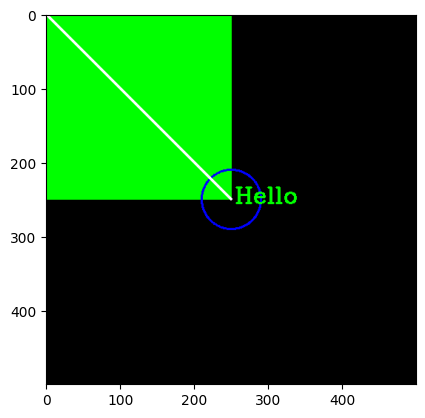

In [31]:
cv.putText(blank,"Hello",(255,255),cv.FONT_HERSHEY_COMPLEX,1.0,(0,255,0),2) # put text on blank at position (255,255), font hershey, scale by 1.0, color of (0,255,0), thickness of 2
plt.imshow(blank)

# 5 Essential functions of opencv

### Convert an image to grayscale

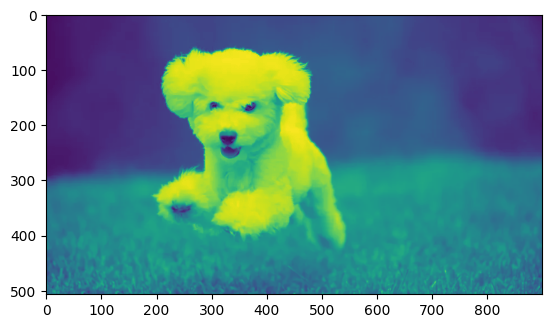

In [35]:
gray = cv.cvtColor(cv.imread("dog.jpeg"),cv.COLOR_BGR2GRAY)
plt.imshow(gray)

### Blurring an image

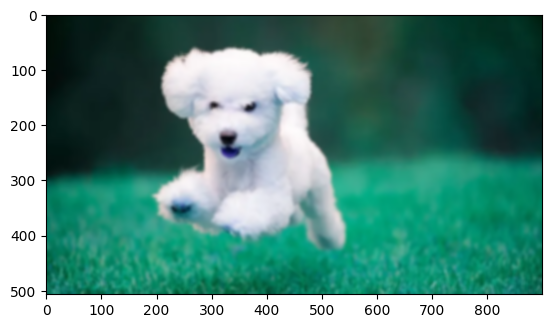

In [38]:
blur = cv.GaussianBlur(img,(7,7),cv.BORDER_DEFAULT) #blur img with 3x3 kernal. to incrase blur, increase kernel size
plt.imshow(blur)

### Edge cascade/detection

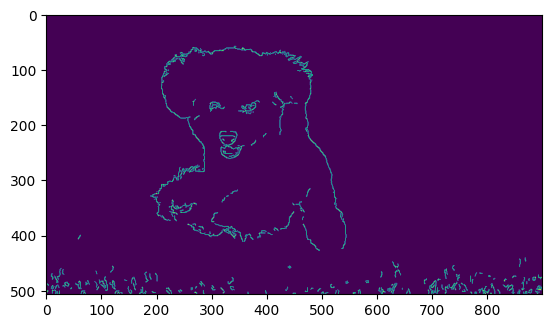

In [39]:
cany = cv.Canny(img,125,175)
plt.imshow(cany)

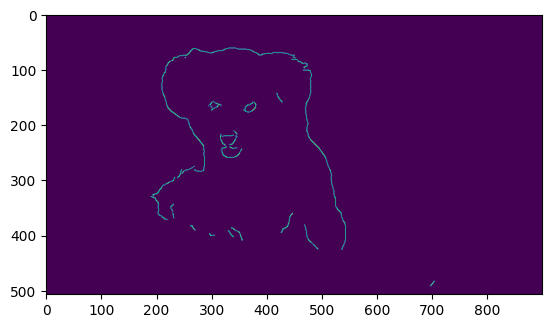

In [41]:
cany = cv.Canny(blur,125,175) ### Reduce the amount of edges by applying blur
plt.imshow(cany)

### Dialating the image

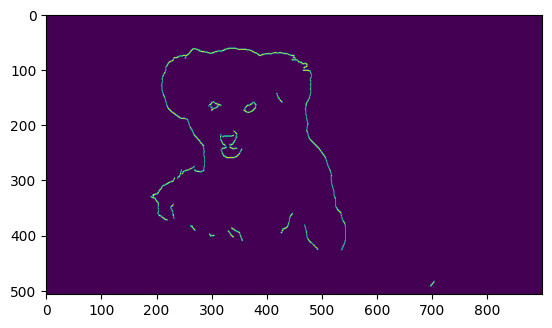

In [43]:
dialated = cv.dilate(cany,(3,3),iterations=1)
plt.imshow(dialated)

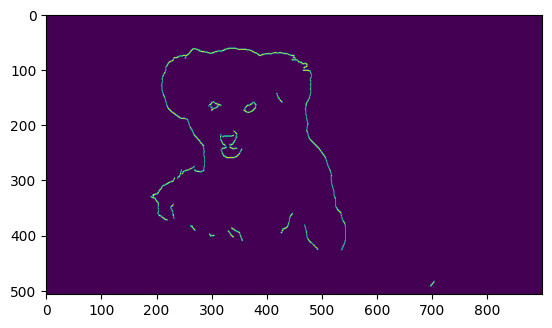

In [45]:
dialated = cv.dilate(cany,(7,7),iterations=1)
plt.imshow(dialated)

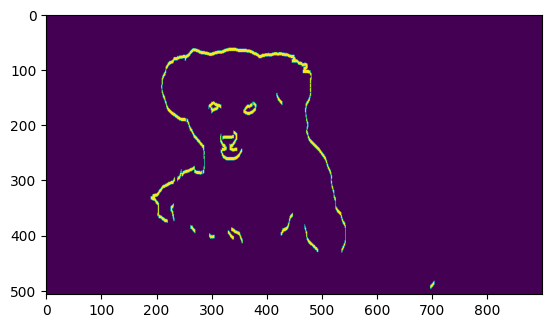

In [44]:
dialated = cv.dilate(cany,(3,3),iterations=5)
plt.imshow(dialated)

### Erode a dialated image back to its original form

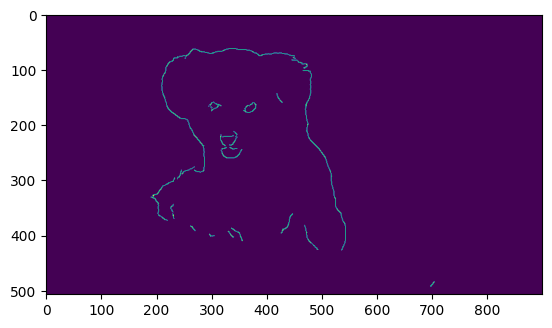

In [47]:
erode = cv.erode(dialated,(3,3),iterations=1)
plt.imshow(erode)

### Resize/crop an image

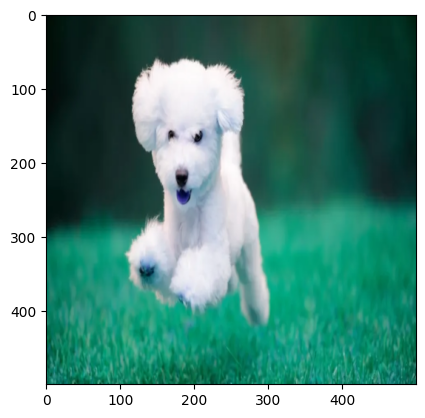

In [49]:
resized = cv.resize(img,(500,500),interpolation=cv.INTER_AREA) #INTER_AREA used when resizing image to smaller resolution
plt.imshow(resized)

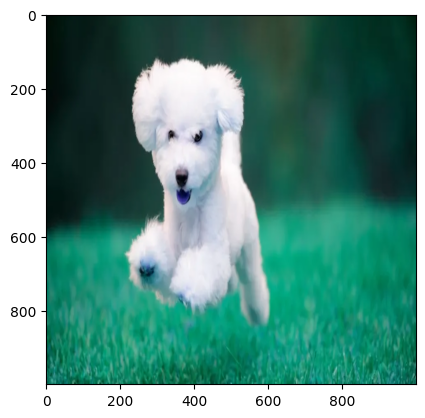

In [54]:
resized = cv.resize(img,(1000,1000),interpolation=cv.INTER_CUBIC) #INTER_CUBIC/INTER_LINEAR used when resizing image to larger resolution. INTER_CUBIC slower but gives better quality
plt.imshow(resized)

### Cropping an image

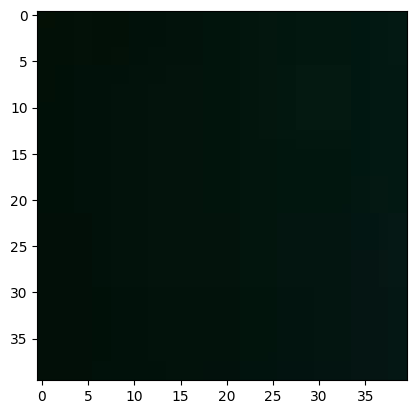

In [3]:
img = cv.imread("dog.jpeg")
cropped = img[10:50,10:50]
plt.imshow(cropped)